# Geometric interpretation of PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [2]:
theta1 = np.pi/6
theta2 = theta1 + np.pi/2

v1 = np.array((np.cos(theta1), np.sin(theta1)))
v2 = np.array((np.cos(theta2), np.sin(theta2)))

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [3]:
b = np.array((20,30))

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution.

In [4]:
rho1 = 12.
rho2 = 3.
n_points = 1000

seeds = np.random.randn(2, n_points)
X = b[:,None] + rho1 * np.outer(v1, seeds[0,:]) + \
                rho2 * np.outer(v2, seeds[1,:])

X.shape

(2, 1000)

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

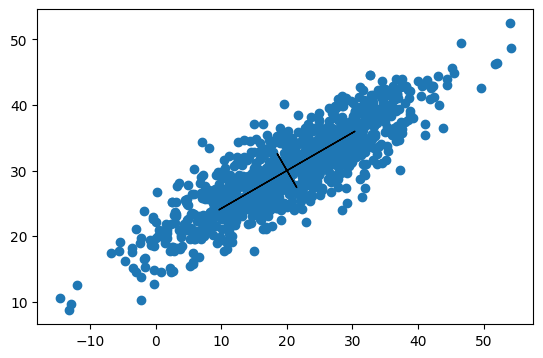

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(X[0, :], X[1, :])
ax.arrow(b[0]-v1[0]*rho1, b[1]-v1[1]*rho1, 2*v1[0]*rho1, 2*v1[1]*rho1, color = 'black')
ax.arrow(b[0]-v2[0]*rho2, b[1]-v2[1]*rho2, 2*v2[0]*rho2, 2*v2[1]*rho2, color = 'black')
ax.set_aspect('equal')

Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [6]:
X_mean = np.mean(X, axis = 1)
U, s, VT = np.linalg.svd(X - X_mean[:, None], full_matrices = False)

In [7]:
print('U shape: ', U.shape)
print('s shape: ', s.shape)
print('VT shape: ', VT.shape)

U shape:  (2, 2)
s shape:  (2,)
VT shape:  (2, 1000)


Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

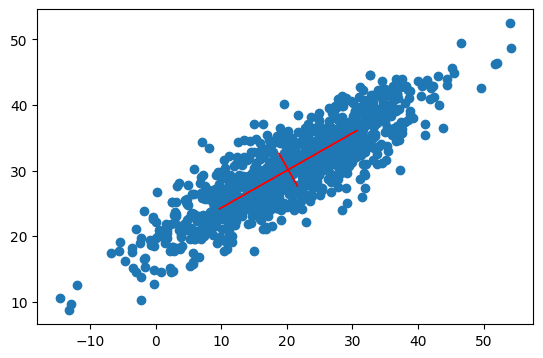

In [8]:
u1 = U[:,0]
u2 = U[:,1]

r = s / np.sqrt(n_points - 1)

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(X[0, :], X[1, :])
plt.arrow(X_mean[0]-u1[0]*r[0], X_mean[1]-u1[1]*r[0], 2*u1[0]*r[0], 2*u1[1]*r[0], color = 'red')
plt.arrow(X_mean[0]-u2[0]*r[1], X_mean[1]-u2[1]*r[1], 2*u2[0]*r[1], 2*u2[1]*r[1], color = 'red')
ax.set_aspect('equal')

In [9]:
v1, v2

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

In [10]:
u1, u2

(array([-0.86904636, -0.49473066]), array([-0.49473066,  0.86904636]))

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [11]:
Phi = np.matmul(U.transpose(), X - X_mean[:, None])

In [12]:
#phi = U.T @ (X-X_mean[:,None])

In [18]:
Phi.shape

(2, 1000)

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

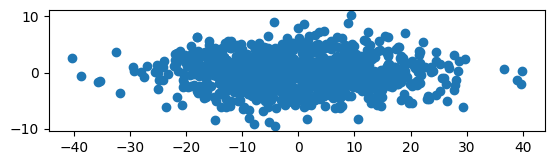

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(Phi[0, :], Phi[1, :])
ax.set_aspect('equal')

e' la proiezione dei dati che avevo prima nel sistema di riferimento che ho individuato prima con le direzioni principali (i vettori delle colonne di U)

infatti phi ha 2 nuovi valori per ogni 1000 punti dei dati
